___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 7<br><br>Image Classification with CNN<br><br>Malaria Data<br><h1>

In [280]:
# Malaria hastalığı ile ilgili hücre görüntüleri datası
# Sınıflandırma
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5840030/


# Dataset Info

The dataset contains 2 folders - 'parasitized', 'uninfected'

And a total of 27,558 images.

This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ 

# Import Libraries and Export Images from Zip_File

In [281]:
import os # os: Operating System
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [282]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [283]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [284]:
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/cell_images.zip", "r")
zip_ref.extractall()
zip_ref.close()

"""
# İstenilen yere download ediyor
import gdown
url = 'https://drive.google.com/u/0/uc?id=1wtZvloOKYdbEvrm4vBXhTUFnLy7ejR5H&export=download'
# output = 'cell_images.zip' # colab
output = '/content/drive/MyDrive/Colab Notebooks/cell_images.zip' # drive
gdown.download(url, output, quiet=False)
"""

"\n# İstenilen yere download ediyor\nimport gdown\nurl = 'https://drive.google.com/u/0/uc?id=1wtZvloOKYdbEvrm4vBXhTUFnLy7ejR5H&export=download'\n# output = 'cell_images.zip' # colab\noutput = '/content/drive/MyDrive/Colab Notebooks/cell_images.zip' # drive\ngdown.download(url, output, quiet=False)\n"

# Recognizing and Understanding Data

In [285]:
my_data_dir = "cell_images"  # Klasör ismini bir değişkene eşitledik

In [286]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir)  # cell_images klasöründeki klasörleri liste halinde gösteriyor 
# os: Operating System 
# Bir dosyaya, klasöre erişeceksek "os" kütüphanesini kullanıyoruz
"""
!sudo apt-get install tree -q
!tree -d ./cell_images/
"""

'\n!sudo apt-get install tree -q\n!tree -d ./cell_images/\n'

In [287]:
test_path = my_data_dir + '/test/'
train_path = my_data_dir + '/train/'

In [288]:
os.listdir(test_path)  # test_path klasörünü içindeki klasörler

['uninfected', 'parasitized']

In [289]:
os.listdir(train_path) # train_path klasörünü içindeki klasörler

['uninfected', 'parasitized']

In [290]:
classes = os.listdir(train_path)
classes
# Ilerde hangi sınıfa ait olduğuna bakabilmek için "classes" adında bir listeye atama yaptık

['uninfected', 'parasitized']

In [291]:
# Yukarda yaptığımız işlemlerin alternatifi olan kod
# Alternative method
import pathlib
data_dir = pathlib.Path(train_path) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['parasitized' 'uninfected']


In [292]:
class_names

array(['parasitized', 'uninfected'], dtype='<U11')

**Let's check how many images there are.**

In [293]:
os.listdir(train_path+'parasitized') # parasitized altında image dosyaları var
# png image in diğer image(svg,jpeg) lere göre farkı ne?
# Background ın transparent(şeffaf) olmasını sağlıyor(Alttaki resme bkz.)
# Not: jpeg: join picture expert group

['C144P105ThinF_IMG_20151015_155004_cell_310.png',
 'C39P4thinF_original_IMG_20150622_105253_cell_92.png',
 'C186P147NThinF_IMG_20151203_150408_cell_184.png',
 'C46P7ThinF_IMG_20151130_205828_cell_151.png',
 'C45P6ThinF_IMG_20151130_155110_cell_207.png',
 'C39P4thinF_original_IMG_20150622_105335_cell_27.png',
 'C185P146ThinF_IMG_20151203_110344_cell_265.png',
 'C48P9thinF_IMG_20150721_161243_cell_153.png',
 'C172P133ThinF_IMG_20151119_155156_cell_255.png',
 'C60P21thinF_IMG_20150804_113011_cell_2.png',
 'C129P90ThinF_IMG_20151004_134636_cell_5.png',
 'C37BP2_thinF_IMG_20150620_131423a_cell_93.png',
 'C91P52ThinF_IMG_20150821_124311_cell_27.png',
 'C39P4thinF_original_IMG_20150622_110115_cell_130.png',
 'C132P93ThinF_IMG_20151004_153030_cell_1.png',
 'C68P29N_ThinF_IMG_20150819_134504_cell_134.png',
 'C80P41ThinF_IMG_20150817_111943_cell_19.png',
 'C68P29N_ThinF_IMG_20150819_134830_cell_26.png',
 'C186P147NThinF_IMG_20151203_150808_cell_132.png',
 'C182P143NThinF_IMG_20151201_172759_cel

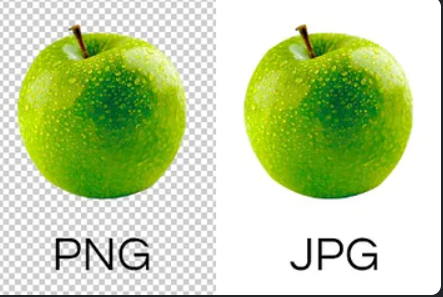

In [294]:
len(os.listdir(train_path+'parasitized')), len(os.listdir(train_path+'uninfected')) # Dosyaların uzunlukları
# Gerçek dünyada da train, test şeklinde klasörlere ayırıp o şekilde çalışmamız gerekecek

(12479, 12479)

In [295]:
len(os.listdir(test_path+'parasitized')), len(os.listdir(test_path+'uninfected'))

(1300, 1300)

In [296]:
# Walk through cell_images directory and list number of files
for dirpath, dirnames, filenames in os.walk(my_data_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

# os.walk : directory içinde gez.(John H: Bu alanda çalışacaksanız bu metod çok kullanışlı)
# Klasörlerle ilgili rapor veriyor

There are 2 directories and 0 images in 'cell_images'.
There are 2 directories and 0 images in 'cell_images/test'.
There are 0 directories and 1300 images in 'cell_images/test/uninfected'.
There are 0 directories and 1300 images in 'cell_images/test/parasitized'.
There are 2 directories and 0 images in 'cell_images/train'.
There are 0 directories and 12479 images in 'cell_images/train/uninfected'.
There are 0 directories and 12479 images in 'cell_images/train/parasitized'.


**Let's take an example images from both train-parasitized and train-uninfected folders to observe process** 

In [297]:
os.listdir(train_path+'parasitized')[:10]  # infected ların içinde ilk 10 tanesini görelim

['C144P105ThinF_IMG_20151015_155004_cell_310.png',
 'C39P4thinF_original_IMG_20150622_105253_cell_92.png',
 'C186P147NThinF_IMG_20151203_150408_cell_184.png',
 'C46P7ThinF_IMG_20151130_205828_cell_151.png',
 'C45P6ThinF_IMG_20151130_155110_cell_207.png',
 'C39P4thinF_original_IMG_20150622_105335_cell_27.png',
 'C185P146ThinF_IMG_20151203_110344_cell_265.png',
 'C48P9thinF_IMG_20150721_161243_cell_153.png',
 'C172P133ThinF_IMG_20151119_155156_cell_255.png',
 'C60P21thinF_IMG_20150804_113011_cell_2.png']

In [298]:
os.listdir(train_path+'parasitized')[5]  # onlardan birini seçiyoruz. Altta görselleştireceğiz

'C39P4thinF_original_IMG_20150622_105335_cell_27.png'

In [299]:
para_cell_path = train_path+'parasitized'+'/C68P29N_ThinF_IMG_20150819_134504_cell_120.png'

In [300]:
para_cell_path

'cell_images/train/parasitized/C68P29N_ThinF_IMG_20150819_134504_cell_120.png'

In [301]:
imread(para_cell_path)  # imread: image i oku ve sayılara dönüştür

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [302]:
para_cell= imread(para_cell_path)

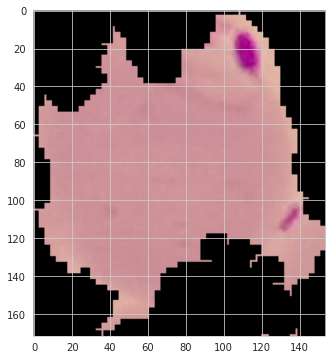

In [303]:
plt.imshow(para_cell); # Parazitli bir hücre. Mor noktalar--> parazit
# Parazit olmayanların içinde de mor lekeli olanlar var. Bunların neden böyle olduğunu net bilmiyoruz

In [304]:
para_cell.shape  # 3 channel--> rgb

(172, 154, 3)

In [305]:
os.listdir(train_path+'uninfected')[:10] # uninfected için aynı işlemleri yapıp içinden bir resmi göreceğiz

['C130P91ThinF_IMG_20151004_141428_cell_23.png',
 'C170P131ThinF_IMG_20151119_120150_cell_121.png',
 'C52P13thinF_IMG_20150725_124830_cell_86.png',
 'C75P36_ThinF_IMG_20150815_163015_cell_14.png',
 'C117P78ThinF_IMG_20150930_221927_cell_67.png',
 'C183P144NThinF_IMG_20151201_223208_cell_50.png',
 'C184P145ThinF_IMG_20151203_103326_cell_87.png',
 'C95P56ThinF_IMG_20150821_171530_cell_4.png',
 'C120P81ThinF_IMG_20151002_130918_cell_153.png',
 'C232ThinF_IMG_20151112_154211_cell_158.png']

In [306]:
uninfected_cell_path = train_path+'uninfected/'+os.listdir(train_path+'uninfected')[5]

In [307]:
imread(uninfected_cell_path)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

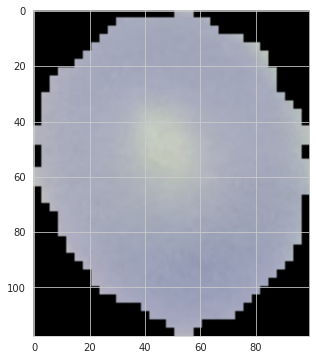

In [308]:
#plt.imshow(imread(uninfected_cell_path));
uninfected_cell = imread(uninfected_cell_path)
plt.imshow(uninfected_cell);

In [309]:
uninfected_cell.shape

(118, 100, 3)

In [310]:
# View a random image
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

  # Vereceğim directory içinden rasgele bir resim alacak ve gösterecek. Her çalıştırdığımızda farklı resim gelecek

Image shape: (100, 133, 3)


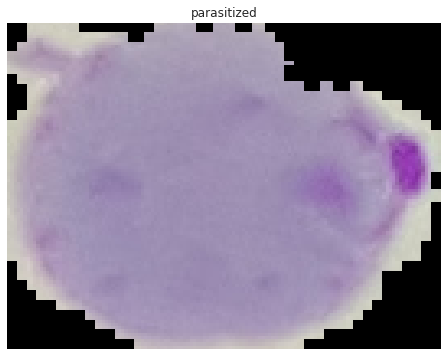

In [311]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path, target_class="parasitized")

Image shape: (136, 139, 3)


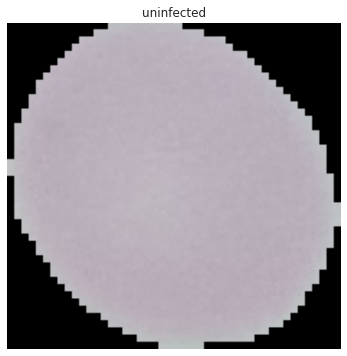

In [312]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path, target_class="uninfected")

Image shape: (154, 148, 3)


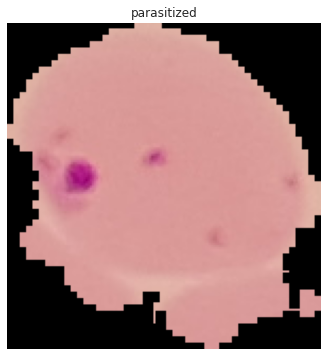

In [313]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_path,
                        target_class=random.choice(class_names)) # get a random class name

# Data Preprocessing

## Defining Input Shape

**Let's decide on the final dimension of these images.**

In [314]:
uninfected_cell.shape 
# Önceden 32x32 gibi böyle düzgündü boyutlar. Şimdi bunlar için orta yol bulup kesmemiz lazım

(118, 100, 3)

In [315]:
para_cell.shape

(172, 154, 3)

#### 1. yaklaşım
x = []
y = []

for image in os.listdir(train_path+'uninfected'):
    img = imread(train_path+'uninfected/'+image)
    d1,d2,_ = img.shape
    x.append(d1)
    y.append(d2)

In [316]:
# 2. yaklaşım
x = [imread(train_path+'uninfected/'+image).shape[0] for image in os.listdir(train_path+'uninfected')] 
y = [imread(train_path+'uninfected/'+image).shape[1] for image in os.listdir(train_path+'uninfected')] 

In [317]:
x[:5]

[139, 133, 127, 154, 136]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


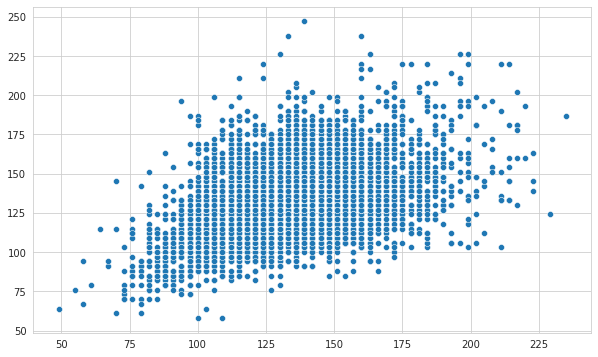

In [318]:
sns.scatterplot(x,y); # resimlerin shape lerinin dağılımı. Buna göre bir orta yol bulacağız
# Resimlerin shape lerini eşitlemeliyiz. Bunların orta noktalarına bakıp karar verelim altta

In [319]:
np.mean(x), np.median(x)

(131.64820899110507, 130.0)

In [320]:
np.mean(y), np.median(y)

(131.4041990544114, 130.0)

In [321]:
# Üstteki sonuçlara göre resimlerimiz shape ini 130x130 olarak belirledik
image_shape = (130,130,3) # Biraz sonra bütün resimleri bu shape e getir diyeceğiz

## Scaling

**Let's check the images if they are needed to be scaled or not**

In [322]:
uninfected_cell.max()

0.81960785

In [323]:
uninfected_cell.min()

0.0

In [324]:
para_cell.max()

0.9372549

In [325]:
para_cell.min()
# Sonuçlar(Matrislerdeki değerler) 0-1 arasında olduğu için scale edilmiş resimler. Scaling e gerek yok

0.0

As we see above, all images have been already scaled

## Image Data Generator

In [326]:
# 2.ders
# Image üzerinde ufak değişiklikler yaparak data sayımızı arttırıyoruz
# Varyasyon arttırarak resmin farklı varyasyonları da öğrenmesini sağlıyoruz hem de overfitting i önlüyoruz

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [327]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [328]:
# help(ImageDataGenerator)

In [329]:
image_gen = ImageDataGenerator(rotation_range=15,       # 15 dereceye kadar rotate et(Bunu belirlemek için; mesela yüz resmi ise 180 rece rotate etmesi mantıklı olmaz vs vs)
                               width_shift_range=0.10,  # genişlikteki öteleme(sağa sola)
                               height_shift_range=0.10, # height öteleme (yukarı aşağı)
                               #rescale=1/255,          # scale i bu aşamada da yapabiliyoruz
                               shear_range=0.1,         # kırma(kenarlardan) aralığı
                               zoom_range=0.1,          # ne kadar yakınlaştırıp uzaklaşacak
                               horizontal_flip=True,    # Yataydaki flip(ayna görüntüsü)
                               fill_mode='nearest')     # resmi kaydırınca, kalan boşluğu en yakındaki pixele göre dolduruyor

# ImageDataGenerator : image in hangi tür varyasyonları olacağını belirliyoruz

# class chat soru: uninfected hücreler dairesel şekilde iken parsitized olanların şekli de bozulmuş Hocam. Bu de belirleyici bir özellik olabilir.
# John H: Image processingteki en önemli adım: Datanın incelenmesi. Dataya göre çözüm yöntemlerinin düşünülmesi gerekiyor. Yoksa böyle bir kaç
# .. resme bakarak hemen işlemlere başlamak çok mantıklı değil

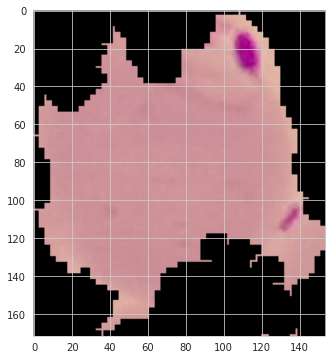

In [330]:
plt.imshow(para_cell);

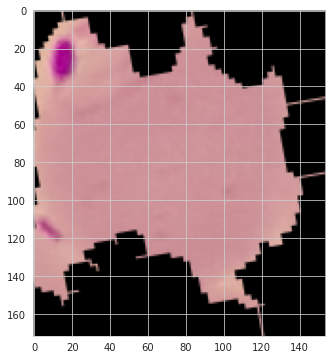

In [331]:
plt.imshow(image_gen.random_transform(para_cell));

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [332]:
#help(image_gen.flow_from_directory)
#Takes the path to a directory & generates batches of augmented data.

In [333]:
# Parametrelerimizi belirledik. Train ve test datalarını CNN e verecek hale getireceğiz flow_from_directory ile
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [334]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [335]:
batch_size = 32  # 64 le olabilir. Ram ile de alakası var biraz. Orta yolu bulmak lazım

In [336]:
image_shape    # Kendimiz belirlemiştik yukarda(Bu image lerin shape i değil)

(130, 130, 3)

In [337]:
train_image_gen = image_gen.flow_from_directory(directory=train_path,        # directory ismi: train path(2 tane class vardı)
                                                target_size=image_shape[:2], # 130x130
                                                color_mode='rgb',            # 3 channel
                                                batch_size=batch_size,       # 32
                                                class_mode='binary',         # Datalarım binary mode da çalışacak
                                                shuffle=True)                # İşlemleri yaparken datamı sürekli kar. Çünkü hep aynı sırayla girince ezbere gidiyor.
                                              
# Train başladığında 32 lik batch üretecek ve bunu CNN e verecek. Datalarım değişmiyor
# Datayı üretme yaklaşımı kullananlarda var. Öyle olursa bunu on fly da kullanmaya gerek kalmıyor

Found 24958 images belonging to 2 classes.


In [338]:
# Aynı şeyi test için yapıyoruz. Ancak shuffle=False çünkü;
# Eğer test datasının sırasını karıştırırsak prediction yaparken oradaki sıralar karışmış olacak ve
# .. hangi prediction hangi değerin prediction ı olacak? Bu karışacağı için shuffle=False dedik 
test_image_gen = image_gen.flow_from_directory(directory=test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [339]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [340]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [341]:
# train_image_gen[0]

In [342]:
train_image_gen[0][0].shape  # batch size dan 32 yi aldı, 130x130 luk resimler, 3 --> rgb den geliyor

(32, 130, 130, 3)

In [343]:
train_image_gen[0][0][0].shape

(130, 130, 3)

In [344]:
len(train_image_gen), len(test_image_gen)

(780, 82)

In [345]:
len(train_image_gen)*batch_size, len(test_image_gen)*batch_size 

(24960, 2624)

In [346]:
# Get a sample of the training data batch 
images, labels = train_image_gen.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [347]:
# Get a sample of the testing data batch 
images, labels = test_image_gen.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

# Modelling-1

In [348]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [349]:
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))
# optimizer = keras.optimizers.Adam(lr=0.01)
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [350]:
model1.summary()
# Non-trainable params: 0.  Neden?. batch normalization kullanmadığımız için

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 64)      

In [351]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)
#  restore_best_weights = False olursa; son epochtaki vall_loss değerini alır

In [352]:
model1.fit(train_image_gen, epochs=10, 
          steps_per_epoch=len(train_image_gen),  # Datam kaç kere image data generatordan geçsin(Folder boyutu kadar). Bunu *2, *3 de yapabiliriz(len(train_image_gen)*2 gibi...) 
          validation_data=test_image_gen, 
          validation_steps=len(test_image_gen),  
          callbacks=[early_stop])
# class chat soru : başa döndüğünde kendi ürettiklerini de kullanmaya başlar mı hocam?
# John H: Kendi ürettikleri uçup gitti.

Epoch 1/10
780/780 [==============================] - 119s 151ms/step - loss: 1.2275 - accuracy: 0.5412 - val_loss: 0.6818 - val_accuracy: 0.5700
Epoch 2/10
780/780 [==============================] - 116s 149ms/step - loss: 0.6775 - accuracy: 0.5778 - val_loss: 0.6800 - val_accuracy: 0.5885
Epoch 3/10
780/780 [==============================] - 117s 150ms/step - loss: 0.6684 - accuracy: 0.6008 - val_loss: 0.6705 - val_accuracy: 0.5873
Epoch 4/10
780/780 [==============================] - 123s 158ms/step - loss: 0.6649 - accuracy: 0.6074 - val_loss: 0.6698 - val_accuracy: 0.5923
Epoch 5/10
780/780 [==============================] - 120s 154ms/step - loss: 0.6591 - accuracy: 0.6170 - val_loss: 0.6705 - val_accuracy: 0.5923
Epoch 6/10
780/780 [==============================] - 116s 149ms/step - loss: 0.6561 - accuracy: 0.6220 - val_loss: 0.6497 - val_accuracy: 0.6273
Epoch 7/10
780/780 [==============================] - 116s 149ms/step - loss: 0.6313 - accuracy: 0.6464 - val_loss: 0.5815 -

In [353]:
# 3. ders
model1.metrics_names

['loss', 'accuracy']

In [354]:
summary = pd.DataFrame(model1.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.228,0.541,0.682,0.570
1,0.678,0.578,0.680,0.588
2,0.668,0.601,0.670,0.587
3,0.665,0.607,0.670,0.592
4,0.659,0.617,0.671,0.592


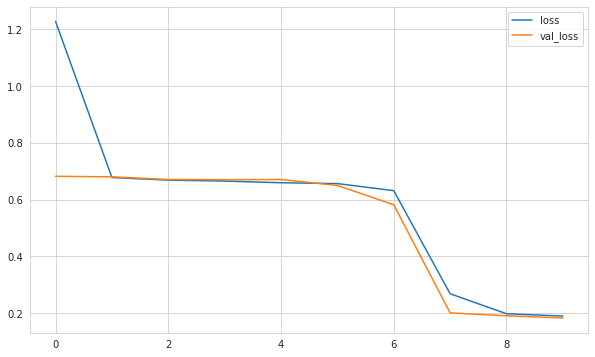

In [355]:
summary[["loss", "val_loss"]].plot();

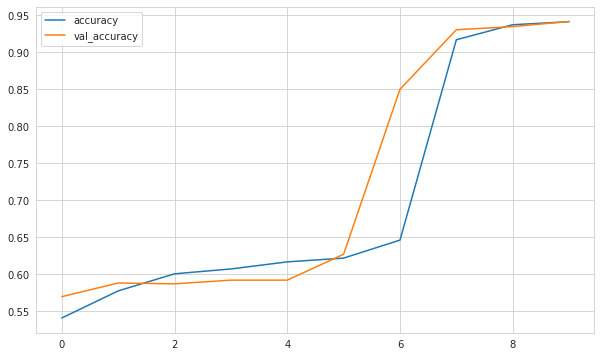

In [356]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [357]:
from sklearn.metrics import classification_report, confusion_matrix

In [358]:
score = model1.evaluate(test_image_gen)  # Burada test_image_gen yerine daha önce X_test, y_test yazmıştık
print('Test loss:', score[0])
print('Test accuracy:', score[1])

82/82 [==============================] - 11s 130ms/step - loss: 0.1682 - accuracy: 0.9408
Test loss: 0.16817736625671387
Test accuracy: 0.9407692551612854


In [359]:
pred_prob = model1.predict(test_image_gen)

In [360]:
pred_prob

array([[6.9902749e-03],
       [9.3943127e-05],
       [1.1792842e-04],
       ...,
       [9.8455936e-01],
       [9.7291273e-01],
       [9.9365932e-01]], dtype=float32)

In [361]:
y_pred = pred_prob > 0.5

In [362]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [363]:
y_test = test_image_gen.classes
y_test

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [364]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1300
           1       0.92      0.97      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [365]:
confusion_matrix(y_test, y_pred)

array([[1185,  115],
       [  42, 1258]])

# Modelling-2

In [85]:
# Modeli biraz daha komplex hale getirelim
model2 = Sequential()

model2.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, padding='same', activation='relu',))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))


model2.add(Flatten())


model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))

model2.add(Dense(1))
model2.add(Activation('sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [86]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 130, 130, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 65, 65, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 65, 65, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 65, 65, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 256)      

In [87]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

In [88]:
model2.fit(train_image_gen,
          epochs=8,
          steps_per_epoch=len(train_image_gen),
          validation_data=test_image_gen,
          validation_steps=len(test_image_gen),
          callbacks=[early_stop])

Epoch 1/8
780/780 [==============================] - 140s 175ms/step - loss: 0.7426 - accuracy: 0.5275 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/8
780/780 [==============================] - 133s 171ms/step - loss: 0.6862 - accuracy: 0.5494 - val_loss: 0.6959 - val_accuracy: 0.5000
Epoch 3/8
780/780 [==============================] - 133s 170ms/step - loss: 0.6729 - accuracy: 0.5647 - val_loss: 0.6672 - val_accuracy: 0.5942
Epoch 4/8
780/780 [==============================] - 132s 170ms/step - loss: 0.4903 - accuracy: 0.7482 - val_loss: 0.1926 - val_accuracy: 0.9335
Epoch 5/8
780/780 [==============================] - 138s 176ms/step - loss: 0.1921 - accuracy: 0.9439 - val_loss: 0.1715 - val_accuracy: 0.9450
Epoch 6/8
780/780 [==============================] - 141s 181ms/step - loss: 0.1730 - accuracy: 0.9475 - val_loss: 0.1610 - val_accuracy: 0.9442
Epoch 7/8
780/780 [==============================] - 135s 174ms/step - loss: 0.1562 - accuracy: 0.9522 - val_loss: 0.1563 - val_ac

In [89]:
model2.metrics_names

['loss', 'accuracy']

In [90]:
summary = pd.DataFrame(model2.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.743,0.528,0.694,0.500
1,0.686,0.549,0.696,0.500
2,0.673,0.565,0.667,0.594
3,0.490,0.748,0.193,0.933
4,0.192,0.944,0.171,0.945


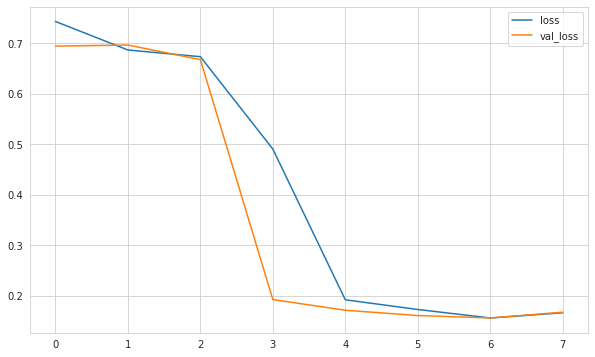

In [91]:
summary[["loss", "val_loss"]].plot();

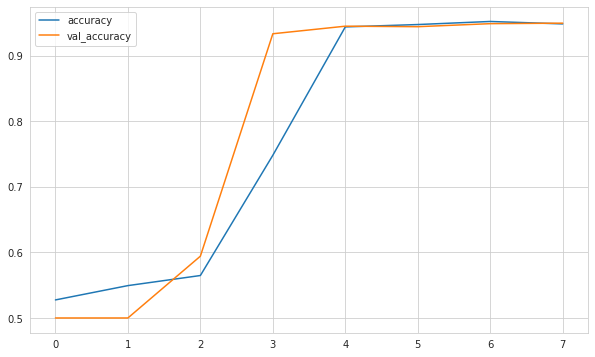

In [92]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [93]:
score = model2.evaluate(test_image_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

82/82 [==============================] - 12s 145ms/step - loss: 0.1642 - accuracy: 0.9515
Test loss: 0.16419824957847595
Test accuracy: 0.9515384435653687


In [94]:
pred_prob = model2.predict(test_image_gen)

In [95]:
y_pred = pred_prob > 0.5

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



                precision    recall  f1-score   support

           0       0.96      0.93      0.95      1300
           1       0.93      0.97      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600

In [97]:
confusion_matrix(y_test, y_pred)

array([[1214,   86],
       [  52, 1248]])

In [98]:
model1.save('malaria_model.h5')

# Prediction

In [99]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [100]:
model=load_model('malaria_model.h5')

In [101]:
target_class=random.choice(class_names)
target_class

'uninfected'

In [102]:
random_image = random.sample(os.listdir(test_path + target_class), 1)
random_image

['C153P114ThinF_IMG_20151115_140242_cell_185.png']

In [103]:
image_path = test_path + target_class + "/" + random_image[0]
image_path

'cell_images/test/uninfected/C153P114ThinF_IMG_20151115_140242_cell_185.png'

In [104]:
my_image = image.load_img(image_path, target_size=image_shape)

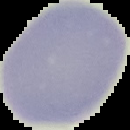

In [105]:
my_image

In [106]:
type(my_image)

PIL.Image.Image

In [107]:
#my_image = np.array(my_image)
my_image = image.img_to_array(my_image)

In [108]:
my_image.shape

(130, 130, 3)

In [109]:
my_image = np.expand_dims(my_image, axis=0)

In [110]:
my_image.shape

(1, 130, 130, 3)

In [111]:
model.predict(my_image)

array([[0.71834606]], dtype=float32)

In [112]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [113]:
def pred_and_plot(model, img_size):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  target_class=random.choice(class_names)
  random_image = random.sample(os.listdir(test_path + target_class), 1)
  img_path = test_path + target_class + "/" + random_image[0]
  img = image.load_img(img_path, target_size=img_size)
  img = np.array(img)
  
  # Make a prediction
  pred = model.predict(np.expand_dims(img, axis=0))
  print("prediction_probability: ", pred.max())

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

prediction_probability:  0.39371178


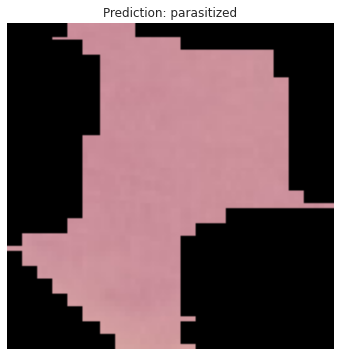

In [114]:
pred_and_plot(model, (130, 130))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___